![tower_bridge](tower_bridge.jpg)

As the climate changes, predicting the weather becomes ever more important for businesses. You have been asked to support on a machine learning project with the aim of building a pipeline to predict the climate in London, England. Specifically, the model should predict mean temperature in degrees Celsius (°C).

Since the weather depends on a lot of different factors, you will want to run a lot of experiments to determine what the best approach is to predict the weather. In this project, you will run experiments for different regression models predicting the mean temperature, using a combination of `sklearn` and `mlflow`.

You will be working with data stored in `london_weather.csv`, which contains the following columns:
- **date** - recorded date of measurement - (**int**)
- **cloud_cover** - cloud cover measurement in oktas - (**float**)
- **sunshine** - sunshine measurement in hours (hrs) - (**float**)
- **global_radiation** - irradiance measurement in Watt per square meter (W/m2) - (**float**)
- **max_temp** - maximum temperature recorded in degrees Celsius (°C) - (**float**)
- **mean_temp** - **target** mean temperature in degrees Celsius (°C) - (**float**)
- **min_temp** - minimum temperature recorded in degrees Celsius (°C) - (**float**)
- **precipitation** - precipitation measurement in millimeters (mm) - (**float**)
- **pressure** - pressure measurement in Pascals (Pa) - (**float**)
- **snow_depth** - snow depth measurement in centimeters (cm) - (**float**)

# **Installation**

In [1]:
# Run this cell to install mlflow
!pip -q install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00


# **Import Libraries & Read Data**

In [2]:
# Run this cell to import the modules you require
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Read in the data
weather = pd.read_csv("london_weather.csv")

In [3]:
weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


# **Visualisation**

In [5]:
# Handling datetime variable
weather['date'] = pd.to_datetime(weather['date'],format="%Y%m%d")
weather['year'] = weather['date'].dt.year
weather['month'] = weather['date'].dt.month
weather['day_of_week'] = weather['date'].dt.dayofweek

weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,year,month,day_of_week
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979,1,0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979,1,1
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979,1,2
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979,1,3
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979,1,4


In [6]:
# Define the columns related to weather
weather_cols = ['cloud_cover','sunshine','global_radiation','max_temp','mean_temp','min_temp','precipitation','pressure','snow_depth']
# Group the data by year and month, and calculate the mean for each group
weather_month = weather.groupby(['year','month'],as_index=False)[weather_cols].mean()

<ipython-input-7-d19718dcbc0d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year',y='mean_temp',data=weather_month,ci=None)


<function matplotlib.pyplot.show(close=None, block=None)>

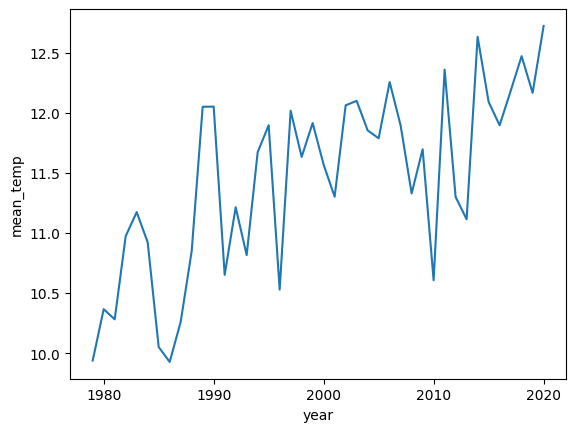

In [7]:
# Plot a line graph of the mean temperature over the years
sns.lineplot(x='year',y='mean_temp',data=weather_month,ci=None)
plt.show

<ipython-input-8-0446722eeb36>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather.corr(),annot=True)


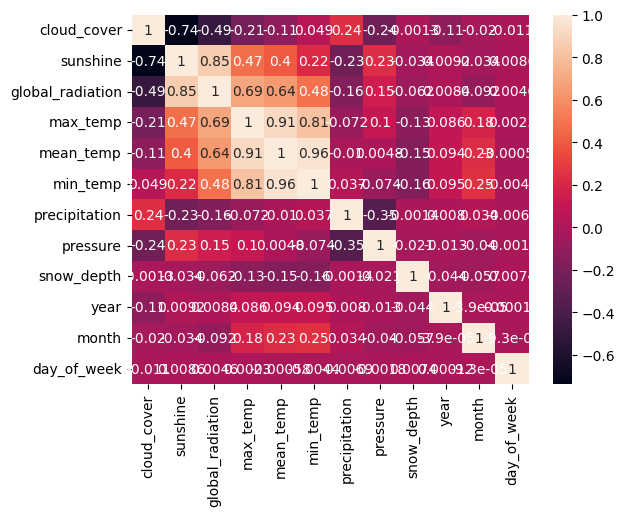

In [8]:
# Create a heatmap of the correlation matrix of the 'weather' DataFrame
sns.heatmap(weather.corr(),annot=True)
plt.show()

# **Split Data**

In [9]:
# Define the features for the model
feature = ['month','cloud_cover','sunshine','global_radiation','precipitation','pressure','snow_depth']
# Define the target variable for the model
target = 'mean_temp'
# Remove rows with missing target variable
weather = weather.dropna(subset=['mean_temp'])

In [10]:
# Split the data into training and test sets
X = weather[feature]
y = weather[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# **Preprocessing Data**

In [11]:
# Preprocessing
# Handle missing values
imputer = SimpleImputer(strategy='mean')
#Fit training data
X_train = imputer.fit_transform(X_train)
#Transform test data
X_test = imputer.transform(X_test)

In [12]:
# Standardize the features
scaler = StandardScaler()
#Fit training data
X_train = scaler.fit_transform(X_train)
#Transform test data
X_test = scaler.transform(X_test)

# **SET Experiment MLflow**

In [13]:
mlflow.set_experiment("Temperature_Prediction-Sklearn_Models")

2024/02/16 16:55:10 INFO mlflow.tracking.fluent: Experiment with name 'Temperature_Prediction-Sklearn_Models' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/651414655400642086', creation_time=1708102510786, experiment_id='651414655400642086', last_update_time=1708102510786, lifecycle_stage='active', name='Temperature_Prediction-Sklearn_Models', tags={}>

# **Modeling**

In [14]:
#Define the model
lr = LinearRegression()

#Train the model
with mlflow.start_run():
    lr.fit(X_train,y_train)

    #Log model
    mlflow.sklearn.log_model(lr,"LinearRegression")

    #Predict on the test set
    y_pred = lr.predict(X_test)

    # Compute metrics and log them
    mse = mean_squared_error(y_test,y_pred,squared=False)
    rmse = np.sqrt(mse)
    mlflow.log_metric('mse', mse)
    mlflow.log_metric('rmse', rmse)

    print(f"Model trained. MSE: {mse}, RMSE: {rmse}")

Model trained. MSE: 3.8204971651429314, RMSE: 1.9546092103392256


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [15]:
#Define the model
dtr = DecisionTreeRegressor(random_state=42)

#Train the model
with mlflow.start_run():
    dtr.fit(X_train,y_train)

    #Log model
    mlflow.sklearn.log_model(dtr,"DecisionTreeRegressor")

    #Predict on the test set
    y_pred = dtr.predict(X_test)

    # Compute metrics and log them
    mse = mean_squared_error(y_test,y_pred,squared=False)
    rmse = np.sqrt(mse)
    mlflow.log_metric('mse', mse)
    mlflow.log_metric('rmse', rmse)

    print(f"Model trained. MSE: {mse}, RMSE: {rmse}")

Model trained. MSE: 3.820334206137741, RMSE: 1.9545675240670866


In [16]:
#Define the model
rfr = RandomForestRegressor(random_state=42)

#Train the model
with mlflow.start_run():
    rfr.fit(X_train,y_train)

    #Log model
    mlflow.sklearn.log_model(rfr,"RandomForestRegressor")

    #Predict on the test set
    y_pred = rfr.predict(X_test)

   # Compute metrics and log them
    mse = mean_squared_error(y_test,y_pred,squared=False)
    rmse = np.sqrt(mse)
    mlflow.log_metric('mse', mse)
    mlflow.log_metric('rmse', rmse)

    print(f"Model trained. MSE: {mse}, RMSE: {rmse}")

Model trained. MSE: 2.774468550959001, RMSE: 1.6656736027682617


# **Search Runs using MLflow**

In [17]:
# Search all runs in experiment
experiment_results = mlflow.search_runs()

experiment_results

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.rmse,metrics.mse,tags.mlflow.runName,tags.mlflow.log-model.history,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.source.name
0,f299bdbe81b643cbb745418911467823,651414655400642086,FINISHED,file:///content/mlruns/651414655400642086/f299...,2024-02-16 16:55:24.892000+00:00,2024-02-16 16:55:32.128000+00:00,1.665674,2.774469,overjoyed-zebra-907,"[{""run_id"": ""f299bdbe81b643cbb745418911467823""...",root,LOCAL,/usr/local/lib/python3.10/dist-packages/colab_...
1,935e83baf45648dbb90d7bffc6fab309,651414655400642086,FINISHED,file:///content/mlruns/651414655400642086/935e...,2024-02-16 16:55:19.803000+00:00,2024-02-16 16:55:22.793000+00:00,1.954568,3.820334,agreeable-crow-853,"[{""run_id"": ""935e83baf45648dbb90d7bffc6fab309""...",root,LOCAL,/usr/local/lib/python3.10/dist-packages/colab_...
2,af9f7cd009a9493486ea45bb0ccf263e,651414655400642086,FINISHED,file:///content/mlruns/651414655400642086/af9f...,2024-02-16 16:55:13.405000+00:00,2024-02-16 16:55:17.458000+00:00,1.954609,3.820497,dapper-crow-300,"[{""run_id"": ""af9f7cd009a9493486ea45bb0ccf263e""...",root,LOCAL,/usr/local/lib/python3.10/dist-packages/colab_...


In [18]:
# Get all metric names
metric_names = experiment_results.columns[experiment_results.columns.str.startswith('metrics.')]

print(metric_names)

Index(['metrics.rmse', 'metrics.mse'], dtype='object')


In [19]:
# Filter the DataFrame to find the models with RMSE of 3 or less
filtered_results = experiment_results[experiment_results['metrics.rmse'] <= 3]

filtered_results

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.rmse,metrics.mse,tags.mlflow.runName,tags.mlflow.log-model.history,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.source.name
0,f299bdbe81b643cbb745418911467823,651414655400642086,FINISHED,file:///content/mlruns/651414655400642086/f299...,2024-02-16 16:55:24.892000+00:00,2024-02-16 16:55:32.128000+00:00,1.665674,2.774469,overjoyed-zebra-907,"[{""run_id"": ""f299bdbe81b643cbb745418911467823""...",root,LOCAL,/usr/local/lib/python3.10/dist-packages/colab_...
1,935e83baf45648dbb90d7bffc6fab309,651414655400642086,FINISHED,file:///content/mlruns/651414655400642086/935e...,2024-02-16 16:55:19.803000+00:00,2024-02-16 16:55:22.793000+00:00,1.954568,3.820334,agreeable-crow-853,"[{""run_id"": ""935e83baf45648dbb90d7bffc6fab309""...",root,LOCAL,/usr/local/lib/python3.10/dist-packages/colab_...
2,af9f7cd009a9493486ea45bb0ccf263e,651414655400642086,FINISHED,file:///content/mlruns/651414655400642086/af9f...,2024-02-16 16:55:13.405000+00:00,2024-02-16 16:55:17.458000+00:00,1.954609,3.820497,dapper-crow-300,"[{""run_id"": ""af9f7cd009a9493486ea45bb0ccf263e""...",root,LOCAL,/usr/local/lib/python3.10/dist-packages/colab_...
